<a href="https://colab.research.google.com/github/aishwaryabhat19/Telecom-Churn-EDA-/blob/main/Aishwarya_Bhat_EDA_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Orange S.A., formerly France Télécom S.A., is a French multinational telecommunications corporation. The Orange Telecom's Churn Dataset, consists of cleaned customer activity data (features), along with a churn label specifying whether a customer canceled the subscription.

## <b> Explore and analyze the data to discover key factors responsible for customer churn and come up with ways/recommendations to ensure customer retention. </b>

In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()

In [ ]:
#Mounting Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importing CSV from the drive and converting csv to pandas df
df = pd.read_csv('/content/drive/MyDrive/Telecom Churn.csv')


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Displaying 1st five rows
df.head(5)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [ ]:
df.shape


(3333, 20)

In [ ]:
# list of columns in the dataset
df.columns


Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

In [ ]:
#checking the data type of each column
df.dtypes

State                      object
Account length              int64
Area code                   int64
International plan         object
Voice mail plan            object
Number vmail messages       int64
Total day minutes         float64
Total day calls             int64
Total day charge          float64
Total eve minutes         float64
Total eve calls             int64
Total eve charge          float64
Total night minutes       float64
Total night calls           int64
Total night charge        float64
Total intl minutes        float64
Total intl calls            int64
Total intl charge         float64
Customer service calls      int64
Churn                        bool
dtype: object

In [ ]:
def initial_overview(dataset):
    
    '''
    This function allows to view initial overview of the data.
    Such as number of rows, features and feature labels, 
    is/are there any missing value/s in the data set?,
    unique values in the dataset


    '''
    
    print('Overview of the Dataset')

    #shape of the Dataset
    print('\n Shape:',df.shape)

    #Rows in the dataset
    print("Rows:", df.shape[0])

    #Column or Feature in the dataset
    print("\nNumber of features:", df.shape[1])
    print("\nFeatures:")
    print(df.columns.tolist())

    #missing value
    missing_value = df.isnull().sum().values.sum()

    if missing_value == 0:
      print('\n Missing Values: No Missing Values')
    else:
      print('\n Missing Values:', missing_value)

    #unique value

    print("\n Unique values:")
    print(df.nunique())

     #Data Type
    print("\n Datatype:")
    print(df.dtypes)

In [ ]:
initial_overview(df)

Overview of the Dataset

 Shape: (3333, 20)
Rows: 3333

Number of features: 20

Features:
['State', 'Account length', 'Area code', 'International plan', 'Voice mail plan', 'Number vmail messages', 'Total day minutes', 'Total day calls', 'Total day charge', 'Total eve minutes', 'Total eve calls', 'Total eve charge', 'Total night minutes', 'Total night calls', 'Total night charge', 'Total intl minutes', 'Total intl calls', 'Total intl charge', 'Customer service calls', 'Churn']

 Missing Values: No Missing Values

 Unique values:
State                       51
Account length             212
Area code                    3
International plan           2
Voice mail plan              2
Number vmail messages       46
Total day minutes         1667
Total day calls            119
Total day charge          1667
Total eve minutes         1611
Total eve calls            123
Total eve charge          1440
Total night minutes       1591
Total night calls          120
Total night charge         933
T

In [ ]:
#Encoding
df["Int_Churn"] = df["Churn"].astype(int)
df["Int_Voice_mail_plan"] = df["Voice mail plan"].map({'Yes': 1, 'No': 0})
df["Int_International_plan"] = df["International plan"].map({'Yes': 1, 'No': 0})

In [ ]:
df.head(11).T

,0,1,2,3,4,5,6,7,8,9,10
State,KS,OH,NJ,OH,OK,AL,MA,MO,LA,WV,IN
Account length,128,107,137,84,75,118,121,147,117,141,65
Area code,415,415,415,408,415,510,510,415,408,415,415
International plan,No,No,No,Yes,Yes,Yes,No,Yes,No,Yes,No
Voice mail plan,Yes,Yes,No,No,No,No,Yes,No,No,Yes,No
Number vmail messages,25,26,0,0,0,0,24,0,0,37,0
Total day minutes,265.1,161.6,243.4,299.4,166.7,223.4,218.2,157.0,184.5,258.6,129.1
Total day calls,110,123,114,71,113,98,88,79,97,84,137
Total day charge,45.07,27.47,41.38,50.9,28.34,37.98,37.09,26.69,31.37,43.96,21.95
Total eve minutes,197.4,195.5,121.2,61.9,148.3,220.6,348.5,103.1,351.6,222.0,228.5


In [ ]:
from matplotlib import pyplot as plt
from matplotlib import pyplot as plt
import seaborn as sns
color = sns.color_palette()

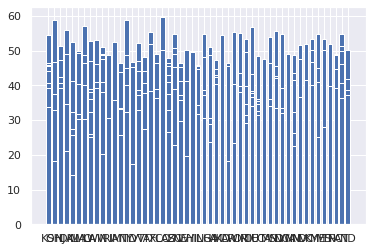

<Figure size 1800x1800 with 0 Axes>

In [ ]:
plt.bar(df.State,df['Total day charge'])
plt.figure(figsize=(25, 25))
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


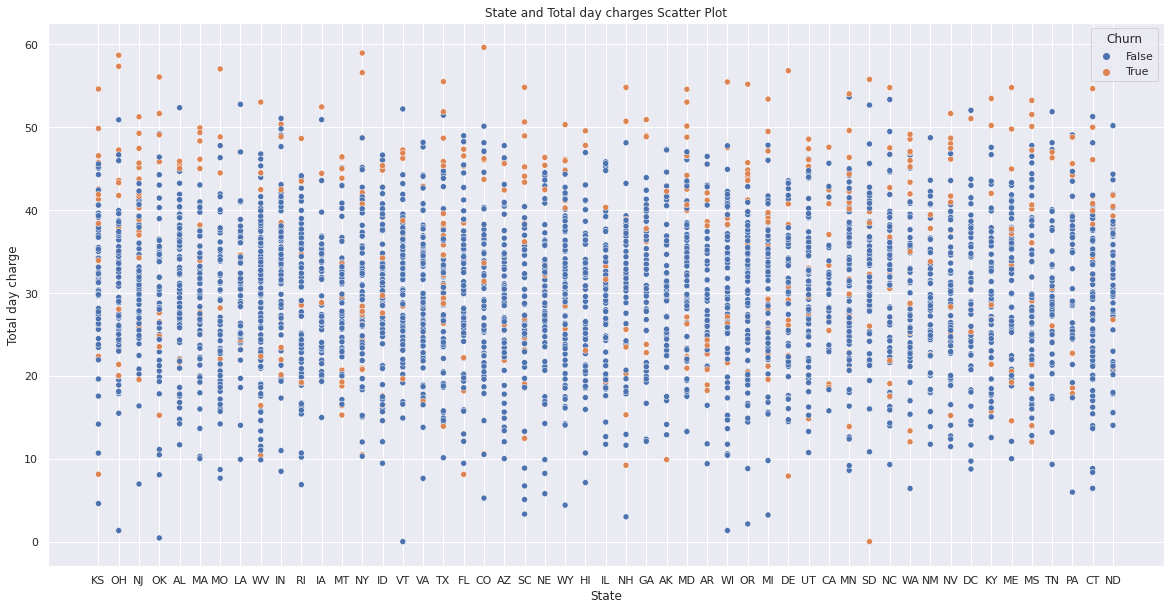

In [ ]:
def df_scattr(a,b,df,c,d,e):
    plt.figure(figsize=(20,10))
    sns.scatterplot(a,b, data=df,hue=e).set(title=f'{c} and {d} Scatter Plot')
    plt.show()

df_scattr(df['State'],df['Total day charge'],df,'State','Total day charges','Churn')
#sns.scatterplot(x="State", y = "Total day charge" , hue="Churn", data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


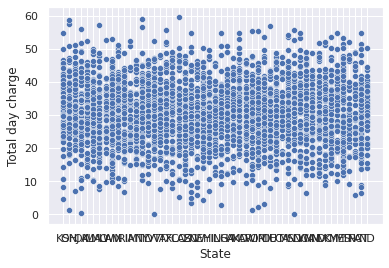

In [ ]:
df['Sum'] = df['Total night calls'] + df['Total day calls']

In [ ]:
df['Sum']

0       201
1       226
2       218
3       160
4       234
       ... 
3328    160
3329    180
3330    200
3331    242
3332    190
Name: Sum, Length: 3333, dtype: int64

In [ ]:
df.dtypes

State                      object
Account length              int64
Area code                   int64
International plan         object
Voice mail plan            object
Number vmail messages       int64
Total day minutes         float64
Total day calls             int64
Total day charge          float64
Total eve minutes         float64
Total eve calls             int64
Total eve charge          float64
Total night minutes       float64
Total night calls           int64
Total night charge        float64
Total intl minutes        float64
Total intl calls            int64
Total intl charge         float64
Customer service calls      int64
Churn                        bool
Int_Churn                   int64
Int_Voice_mail_plan         int64
Int_International_plan      int64
Sum                         int64
dtype: object

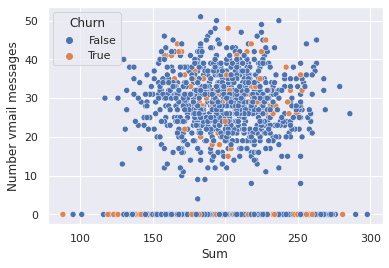

<Figure size 1800x1080 with 0 Axes>

In [ ]:
sns.scatterplot(x='Sum',y='Number vmail messages',hue='Churn',data=df)
plt.figure(figsize=(25, 15))
plt.show()

